In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


## No 1

In [223]:
df = pd.read_csv('medical_examination.csv')
df.head()
df.shape

(70000, 13)

In [59]:
df['BMI'] = df['weight'] / (df['height']/100)**2
df['overweight'] = df['BMI'].apply(lambda x: 1 if x > 25 else 0)
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0


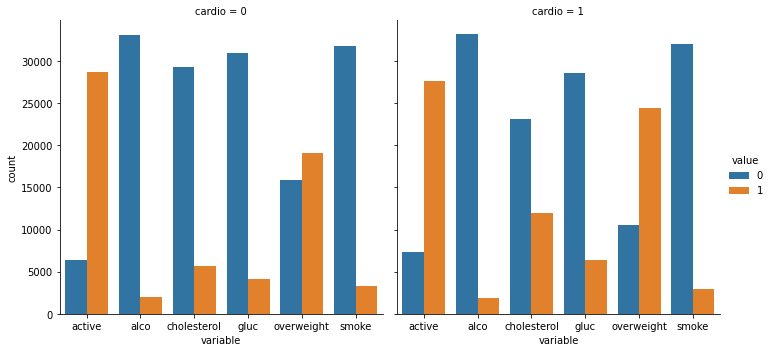

In [107]:
df_cat = pd.melt(df, id_vars = ['cardio'], value_vars =['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

df_cat = df_cat.sort_values(by='variable')

sns.catplot(x='variable', hue='value', col='cardio', data=df_cat, kind='count')



## No. 2

In [224]:
df = pd.read_csv('medical_examination.csv')
df['BMI'] = df['weight'] / (df['height']/100)**2
df['overweight'] = df['BMI'].apply(lambda x: 1 if x > 25 else 0)
df.drop('BMI', axis=1, inplace=True)
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [225]:
df.shape

(70000, 14)

In [226]:
df.drop(df[df['ap_lo'] > df['ap_hi']].index, inplace=True)
df.drop(df[df['height'] < df['height'].quantile(0.025)].index, inplace=True)
df.drop(df[df['height'] > df['height'].quantile(0.975)].index, inplace=True)
df.drop(df[df['weight'] < df['weight'].quantile(0.025)].index, inplace=True)
df.drop(df[df['weight'] > df['weight'].quantile(0.975)].index, inplace=True)
df.shape

(62784, 14)

In [231]:
corr = df.corr(method='pearson')

In [232]:
mask = np.tril(np.ones(corr.shape).astype(np.bool), -1)

In [235]:
corr = corr.where(mask)
corr

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,0.002623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,0.003799,-0.018274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
height,0.000221,-0.077426,0.504722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,0.000144,0.069705,0.130116,0.248868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ap_hi,0.003489,0.018482,0.004941,0.004300,0.026527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ap_lo,0.000429,0.152787,0.059500,0.015356,0.223786,0.072260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cholesterol,0.003867,0.129582,-0.037669,-0.064477,0.132686,0.022606,0.148701,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gluc,0.002477,0.087280,-0.021178,-0.031410,0.104475,0.011004,0.073920,0.383601,NaN,NaN,NaN,NaN,NaN,NaN
smoke,-0.002403,-0.044208,0.337682,0.187389,0.055805,-0.001978,0.022997,0.012797,-0.004203,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

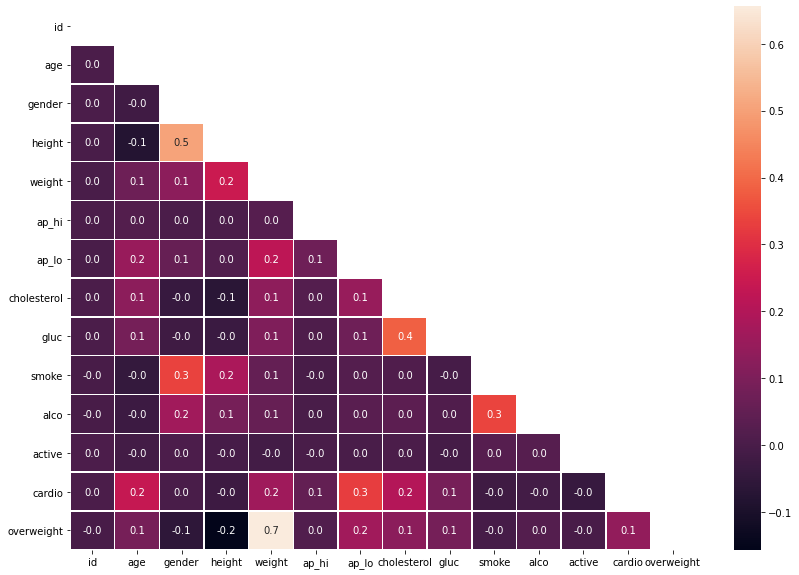

In [236]:
fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(corr , linewidths=0.5, annot=True, fmt='0.1f', ax=ax)